# Tool zur Erstellung von technischen Graphen <img style="float: right;" src="img/haw_logo_black.png"  width="200"/>
####   In diesem Notebook sind verschiedene Vorlagen für unterschiedliche Graphen. Dieses Tool soll die Erstellung von Prakikumsberichten vereinfachen.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from scipy.interpolate import interp1d

%matplotlib inline

Importiere Messdaten aus csv-Datei:

In [2]:
filepath = 'measurements/ELP1_2_Aufgabe_2.csv'
data = pd.read_csv(filepath)
print("Vorschau der Daten:")
data.head()
#data.tail()

Vorschau der Daten:


I_F / A  U_F / V Vorwiderstand
0  0.000001    0.281       100 Ohm
1  0.000002    0.313           NaN
2  0.000005    0.362           NaN
3  0.000010    0.390           NaN
4  0.000020    0.426           NaN

## 1. Balkendiagramm

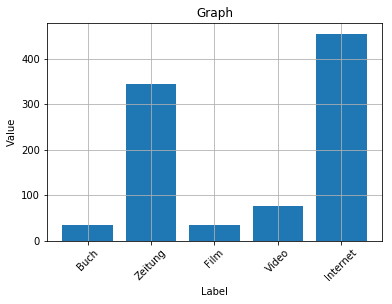

In [52]:
base_color = sb.color_palette()[0]
plt.bar(data = data, x = 'Label', height = 'Value', color = base_color);

plt.xticks(rotation = 45);
plt.grid()

plt.xlabel("Label")
plt.ylabel("Value")
plt.title("Graph")

plt.savefig("graph.svg", transparent=False, format='svg')
plt.show()

## 2. Liniendiagramm

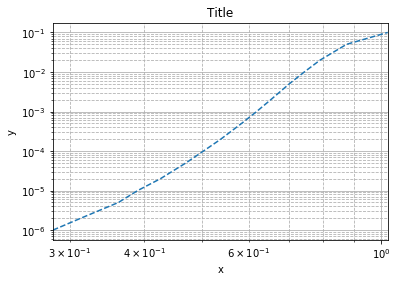

In [19]:
base_color = sb.color_palette()[0]

fig, ax = plt.subplots()

ax.minorticks_on()

ax.plot(data['x'], data['y'], '--',) # 1.Datenlinie
ax.plot(data['x'], data['y']-1) # 2.Datenlinie

ax.set_xlim([data['x'][0], data['x'][30]])

ax.set(xlabel='x', ylabel='y',
       title='Title')

ax.grid(which='major', linestyle='-')
ax.grid(which='minor', linestyle='--')

plt.savefig("graph.svg", transparent=False, format='svg')
plt.show()

## 3. Figure mit 2 Subplots mit gleicher x-Achsen

C:\Users\malte\Anaconda3\lib\site-packages\matplotlib\figure.py:457: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


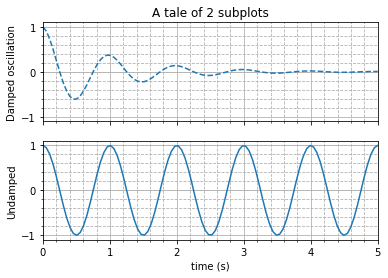

In [10]:
x = np.linspace(0.0, 5.0, num=100)


y1 = np.cos(2 * np.pi * x) * np.exp(-x)
y2 = np.cos(2 * np.pi * x)

fig, (ax1, ax2) = plt.subplots(2, 1, sharey=True)

ax1.minorticks_on()
ax2.minorticks_on()

#plt.subplot(2, 1, 1)
ax1.plot(x, y1, '--')
ax1.set_xlim([x[0], x[-1]])
ax1.set_title('A tale of 2 subplots')
ax1.set_ylabel('Damped oscillation')

ax1.grid(which='major',  linestyle='-')
ax1.grid(which='minor',  linestyle='--')

ax1.set_xticklabels([''])

#plt.subplot(2, 1, 2)
ax2.plot(x, y2, '-')
ax2.set_xlim([x[0], x[-1]])
ax2.set_xlabel('time (s)')
ax2.set_ylabel('Undamped')

ax2.grid(which='major',  linestyle='-')
ax2.grid(which='minor',  linestyle='--')

fig.savefig("graph.svg", transparent=False, format='svg')
fig.show()

## 4. Bode Diagramm

C:\Users\malte\Anaconda3\lib\site-packages\matplotlib\figure.py:457: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


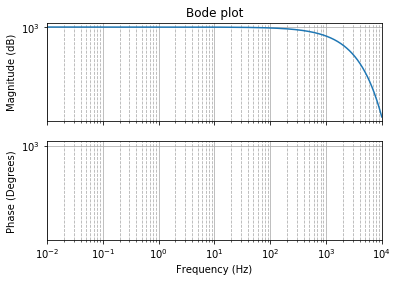

In [27]:
x = np.linspace(0.01, 10000.0, num=10000)


magnitude =  (1000 - x/1000) 
phase = np.cos(2 * np.pi * x)

fig, (ax1, ax2) = plt.subplots(2, 1, sharey=True)

ax1.minorticks_on()
ax2.minorticks_on()

ax1.loglog(x, magnitude, '-')
ax1.set_xlim([x[0], x[-1]])
ax1.set_title('Bode plot')
ax1.set_ylabel('Magnitude (dB)')

ax1.grid(which='major',  linestyle='-')
ax1.grid(which='minor',  linestyle='--')

ax1.set_xticklabels([''])


ax2.loglog(x, phase, '-')
ax2.set_xlim([x[0], x[-1]])
ax2.set_xlabel('Frequency (Hz)')
ax2.set_ylabel('Phase (Degrees)')

ax2.grid(which='major',  linestyle='-')
ax2.grid(which='minor',  linestyle='--')

#fig.savefig("graph.svg", transparent=False, format='svg')
fig.show()

## 5. Figure mit 4 Subplots

C:\Users\malte\Anaconda3\lib\site-packages\matplotlib\figure.py:457: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


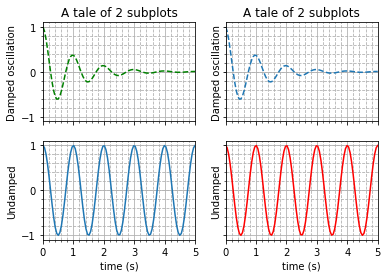

In [37]:
x1 = np.linspace(0.0, 5.0, num=100)


y1 = np.cos(2 * np.pi * x1) * np.exp(-x1)
y2 = np.cos(2 * np.pi * x1)

fig, axes = plt.subplots(2, 2, sharey=True)

axes[0,0].minorticks_on()
axes[1,0].minorticks_on()
axes[0,1].minorticks_on()
axes[1,1].minorticks_on()

# Oben links
axes[0,0].plot(x1, y1, 'g--')
axes[0,0].set_xlim([x1[0], x1[-1]])
axes[0,0].set_title('A tale of 2 subplots')
axes[0,0].set_ylabel('Damped oscillation')

axes[0,0].grid(which='major',  linestyle='-')
axes[0,0].grid(which='minor',  linestyle='--')
axes[0,0].set_xticklabels([''])

# Unten linkes
axes[1,0].plot(x1, y2, '-')
axes[1,0].set_xlim([x1[0], x1[-1]])
axes[1,0].set_xlabel('time (s)')
axes[1,0].set_ylabel('Undamped')

axes[1,0].grid(which='major',  linestyle='-')
axes[1,0].grid(which='minor',  linestyle='--')

# Oben rechts
axes[0,1].plot(x1, y1, '--')
axes[0,1].set_xlim([x1[0], x1[-1]])
axes[0,1].set_title('A tale of 2 subplots')
axes[0,1].set_ylabel('Damped oscillation')

axes[0,1].grid(which='major',  linestyle='-')
axes[0,1].grid(which='minor',  linestyle='--')
axes[0,1].set_xticklabels([''])

# Unten rechts
axes[1,1].plot(x1, y2, '-', color = 'r')
axes[1,1].set_xlim([x1[0], x1[-1]])
axes[1,1].set_xlabel('time (s)')
axes[1,1].set_ylabel('Undamped')

axes[1,1].grid(which='major',  linestyle='-')
axes[1,1].grid(which='minor',  linestyle='--')


fig.savefig("graph.svg", transparent=False, format='svg')
fig.show()

## 6. Interpolierte Graphen

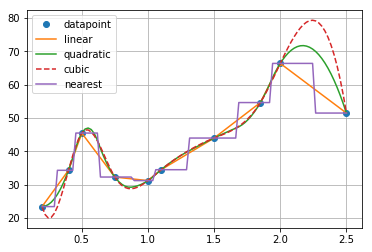

In [30]:
# Testdaten
x = [0.2, 0.4, 0.5, 0.75, 1, 1.1, 1.5, 1.85, 2, 2.5]
y = [23.43, 34.32, 45.5, 32.3, 31.23, 34.5, 44, 54.65, 66.4, 51.5]

x_new = np.linspace(x[0], x[-1], num = 100)

f1 = interp1d(x, y)
f2 = interp1d(x, y, kind='quadratic')
f3 = interp1d(x, y, kind='cubic')
f4 = interp1d(x, y, kind='nearest')

plt.plot(x, y, 'o', x_new, f1(x_new), '-', x_new, f2(x_new), '-', x_new, f3(x_new), '--', x_new, f4(x_new), '-')
plt.grid()

plt.legend(['datapoint', 'linear', 'quadratic','cubic', 'nearest'], loc='best')

plt.show()

## 7. Logarithmische Darstellung

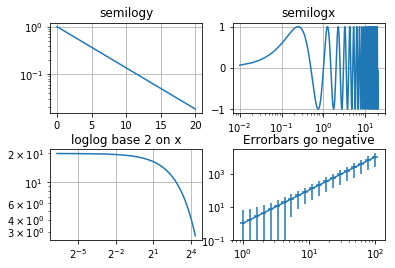

In [38]:
plt.subplots_adjust(hspace=0.4)
t = np.arange(0.01, 20.0, 0.01)

# log y axis
plt.subplot(221)
plt.semilogy(t, np.exp(-t/5.0))
plt.title('semilogy')
plt.grid(True)

# log x axis
plt.subplot(222)
plt.semilogx(t, np.sin(2*np.pi*t))
plt.title('semilogx')
plt.grid(True)

# log x and y axis
plt.subplot(223)
plt.loglog(t, 20*np.exp(-t/10.0), basex=2)
plt.grid(True)
plt.title('loglog base 2 on x')

# with errorbars: clip non-positive values
ax = plt.subplot(224)
ax.set_xscale("log", nonposx='clip')
ax.set_yscale("log", nonposy='clip')

x = 10.0**np.linspace(0.0, 2.0, 20)
y = x**2.0
plt.errorbar(x, y, xerr=0.1*x, yerr=5.0 + 0.75*y)
ax.set_ylim(ymin=0.1)
ax.set_title('Errorbars go negative')


plt.show()

## 8. Log-log Darstellung

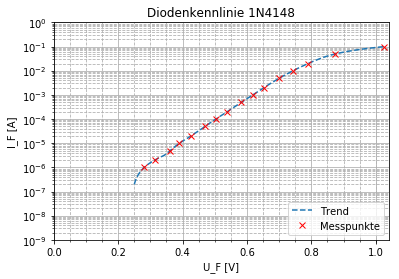

In [6]:
#t = np.arange(0.01, 20.0, 0.01)

fig, ax = plt.subplots()
ax.minorticks_on()



f1 = interp1d([0.25,0.281,0.313,0.362, 0.39, 0.426, 0.47, 0.503, 0.538, 0.583, 0.618, 0.653, 0.701, 0.743, 0.79, 0.875, 1.026], [0.0000002, 0.000001, 0.000002, 0.000005, 0.00001, 0.00002,0.00005, 0.0001, 0.0002, 0.0005, 0.001,0.002,0.005, 0.01, 0.02, 0.05, 0.1], kind='quadratic')
#f2 = interp1d(data['inter f']*1000, data['inter rv'], kind='cubic')
#f3 = interp1d([1000,2000,4000,10000,12000, 50000,100000], [22,36,42.5,43,43, 99.5, 515.5], kind='cubic')
x = np.linspace(0.25, 1.026, num = 500)

[]

ax.semilogy(x, f1(x),'--',  data['U_F / V'], data['I_F / A'], 'rx')

ax.set_ylim([0.000000001, 1])
ax.set_xlim([0, 1.04])

ax.grid(which='major',  linestyle='-')
ax.grid(which='minor',  linestyle='--')
ax.set_title('Diodenkennlinie 1N4148')
ax.set_ylabel('I_F [A]')
ax.set_xlabel('U_F [V]')

ax.legend(['Trend','Messpunkte'], loc='lower right')

#fig.savefig("elp1-2-a2-new.png", dpi=300, transparent=False, format='png')

## 9. Semi-log Darstellung

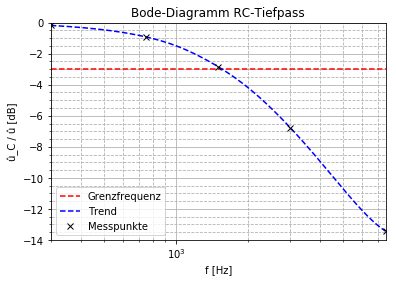

In [31]:
f = [300, 750, 1500, 3000, 7500]
u_db = [-0.184, -0.924, -2.841,-6.763,-13.432]

#f = [0.5, 1, 2, 5, 10, 20, 50, 100]
#u_db= [-20.7, -17.78, -11.87,-5.114,-1.830, -0.556, -0.07, 0]

fig, ax = plt.subplots()
ax.minorticks_on()

f1 = interp1d(f, u_db, kind='quadratic')
x = np.linspace(300, 7500, num = 500)

db3 = interp1d([300, 7500], [-3,-3], kind='linear')

ax.semilogx(x, db3(x), 'r--',x, f1(x),'b--', f, u_db, 'kx')

ax.set_ylim([-14, 0])
ax.set_xlim([300, 7500])

ax.grid(which='major',  linestyle='-')
ax.grid(which='minor',  linestyle='--')
ax.set_title('Bode-Diagramm RC-Tiefpass')
ax.set_ylabel('û_C / û [dB]')
ax.set_xlabel('f [Hz]')

ax.legend(['Grenzfrequenz','Trend','Messpunkte'], loc='lower left')

#fig.savefig("elt2-3-a4.png", dpi=300, transparent=False, format='png')

## 10. Kuchendiagramm

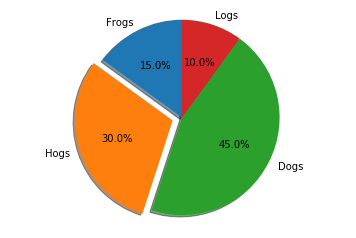

In [34]:
labels = 'Frogs', 'Hogs', 'Dogs', 'Logs'
sizes = [15, 30, 45, 10]
explode = (0, 0.1, 0, 0)

fig, ax = plt.subplots()
ax.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)

ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

--------------------------------------------------
<div style="float: right;">© Malte Mueller 2019</div>